In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy, math
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler

### Task 1: Implement `compute_cost_matrix` function to calculate the total cost

In [2]:
#Function to calculate the cost
def compute_cost_matrix(X, y, w):
    """
    Computes the gradient for linear regression
     Args:
      X (ndarray (m,n+1)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n+1,)) : model parameters  
    Returns
      cost: (scalar)
    """
    # use vectorization to implement the cost for linear regression
    m = X.shape[0]  # m = len(y)

    # calculate f_wb for all examples.
    f_wb = X @ w
    # calculate cost
    cost = (1/(2*m)) * np.sum((f_wb-y)**2)
    return cost



### Task 2: Implement `compute_gradient_matrix` function to calculate the gradient

In [3]:
def compute_gradient_matrix(X, y, w):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n+1)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n+1,)) : model parameters  
    Returns
      dj_dw (ndarray (n+1,1)): The gradient of the cost w.r.t. the parameters w.
    """
    # use vectorization to implement the gradient for linear regression
    m = len(y)
    f_wb = X @ w
    # f_wb = np.dot(X, w)
    e   = f_wb - y
    dj_dw  = (1/m) * (X.T @ e)

    return dj_dw

### Task 3: Implement `gradient_descent_matrix` function below

In [4]:
def gradient_descent_matrix(X, y, w_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w. Updates w by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n+1))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n+1,)) : initial model parameters  
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n+1,)) : Updated values of parameters
      J_history           : Cost of the model after each iteration
      """
    
    # implement the batch gradient descent algorithm using the compute_gradient and compute_cost functions
    w = copy.deepcopy(w_in)
    J_history = []
    for i in range(num_iters):
        w = w - alpha * compute_gradient_matrix(X, y, w)
        J_history.append(compute_cost_matrix_b(X, y, w))

        # print cost every 100 iterations
        if i % 100 == 0:
            print("Iteration: ", i, " Cost: ", J_history[i])
    return w, J_history

### Task 4: Check your implementation on the house dataset

In [5]:
# load the dataset
data = np.loadtxt("data/houses.txt", delimiter=',')
X_train, y_train = data[:,:-1], data[:,-1]
X_features = ['size(sqft)','bedrooms','floors','age']

In [6]:
# do feature scaling for the x_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [7]:
# add a column of ones to X to account for the bias term
X_train_scaled_1 = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))

# initialize the model parameters to 0
w = np.zeros(X_train_scaled_1.shape[1])

# run the gradient descent algorithm for 10000 iterations with a learning rate of 0.01
w, J_history = gradient_descent_matrix(X_train_scaled_1, y_train, w, 0.01, 1000)
print(f"w found by gradient descent: {w} ")

Iteration:  0  Cost:  69584.11865729908
Iteration:  100  Cost:  9927.786797279285
Iteration:  200  Cost:  1875.0640535638813
Iteration:  300  Cost:  624.791825792436
Iteration:  400  Cost:  368.08973915189966
Iteration:  500  Cost:  287.9827726348621
Iteration:  600  Cost:  253.76612862123432
Iteration:  700  Cost:  237.10093389171556
Iteration:  800  Cost:  228.64869055201007
Iteration:  900  Cost:  224.31302636299347
w found by gradient descent: [362.22388167 107.61300784 -19.98576799 -30.96395524 -38.35125229] 


### Task 5: Plotting the cost over the iterations below

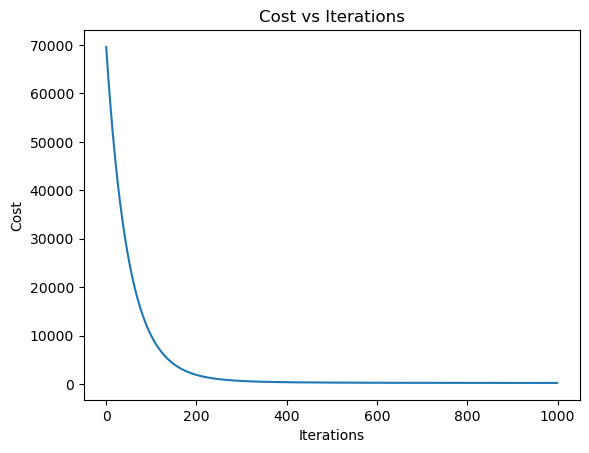

In [8]:
# plot the cost over the iterations
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


### Task 6: Using linear regression from sklearn to learn the model parameters

In [9]:
# use linear regression from sklearn to learn the model parameters and compare them to the ones found by gradient descent
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print(f"Linear regression parameters: {lin_reg.intercept_} {lin_reg.coef_}")

Linear regression parameters: 362.23952 [110.61335173 -21.47323884 -32.66070323 -37.77938362]


### Task 7: Using stochastic gradient descent from sklearn to learn the model parameters

In [10]:
# use stochastic gradient descent from sklearn to learn the model parameters and compare them to the ones found by gradient descent
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01)
sgd_reg.fit(X_train_scaled, y_train)
print(f"SGD parameters: {sgd_reg.intercept_} {sgd_reg.coef_}")


SGD parameters: [362.25346254] [109.99247854 -21.13904325 -32.29084121 -37.92120915]


### Task 8: Put the model parameters from gradient descent, linear regression and SGD in a dataframe for comparision

In [11]:
# put the model parameters from gradient descent, linear regression and SGD in a dataframe
model_params = {'Gradient Descent': w, 'Linear Regression': np.append(lin_reg.intercept_, lin_reg.coef_), 'SGD': np.append(sgd_reg.intercept_, sgd_reg.coef_)}
model_params_df = pd.DataFrame(model_params, index=['b']+X_features)
model_params_df


,Gradient Descent,Linear Regression,SGD
b,362.223882,362.239520,362.253463
size(sqft),107.613008,110.613352,109.992479
bedrooms,-19.985768,-21.473239,-21.139043
floors,-30.963955,-32.660703,-32.290841
age,-38.351252,-37.779384,-37.921209


In [12]:
# Predict the price of a house with 1650 sqft, 3 bedrooms, 2 floors and 20 years old using the model parameters from gradient descent, linear regression and SGD
X_test = np.array([1650, 3, 2, 20]).reshape(1, -1)
X_test_scaled = scaler.transform(X_test)
X_test_scaled_1 = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled))

price_gd = X_test_scaled_1.dot(w)
price_lr = lin_reg.predict(X_test_scaled)
price_sgd = sgd_reg.predict(X_test_scaled)

print(f"Price of the house using gradient descent: {price_gd}")
print(f"Price of the house using linear regression: {price_lr}")
print(f"Price of the house using SGD: {price_sgd}")


Price of the house using gradient descent: [403.22281488]
Price of the house using linear regression: [401.71656302]
Price of the house using SGD: [402.09809592]
